## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 고객 Segmentation을 위한 RFM분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 RFM Segmentaion
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ Segmentation 기법인 RFM 개념을 이해하고, 적용할 수 있는 역량 습득
```

> **문제정의**

```
▶ 런칭 이후 서비스 정체기로 인한 영업이익, 사용 고객수 감소하고 있다고 가정한다.
```  


> **해결방안**

```
▶ 구매 데이터 활용 고객들의 서비스 이용 현황 파악(지표 기획)
```

> **성과측정**  

```
▶ 지표 활용 서비스 사용 현황 파악
```

> **운영**  

```
▶ 지표 활용 데이터 인사이트 리포트 발행
▶ 개발된 지표 활용 대시보드(*BI tool 활용) 개발 후 모니터링 및 이슈 확인
```

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/개인 공부/이커머스 RFM Segmentation'

In [ ]:
# pd.set_option(...)은 데이터를 출력할 때 나타날 행과 열의 최대 갯수를 설정하는 함수

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df=pd.read_csv('S_PJT06_DATA.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## EDA 및 전처리


In [ ]:
print('df', df.shape)
print('='*30)
print(df.info())
print('='*30)
df.isna().sum()

# 상품 설명과 customer id에 null값이 꽤 많이 보인다.

df (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# null값을 없애자. 50만개의 데이터가 있으므로 13만개 정도는 없애도 될 듯.

df = df.dropna(subset=['CustomerID'], how='all').reset_index(drop=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
print(df.info())
df

# 541909행에서 406829행이 되었다. 즉 135080행이 삭제되었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# 수치형 feature들의 기술통계량 확인
df.describe()

# 수량이 마이너스인 품목이 있다.
# 수량이 마이너스 일 리는 없으므로, 이상치다

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: xlabel='Quantity', ylabel='Density'>

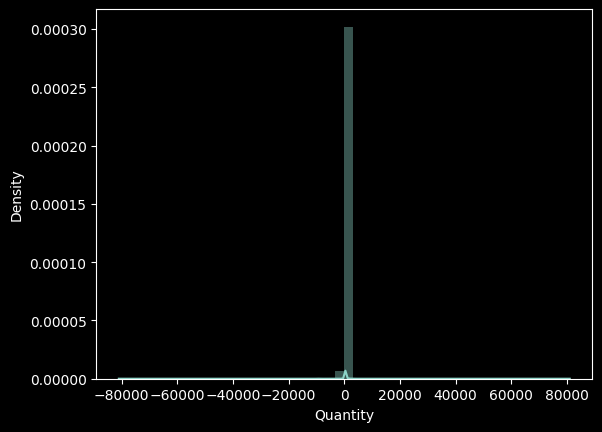

In [ ]:
# plt.style.use(['dark_background'])
sns.distplot(df.Quantity)

In [ ]:
# quantity 중 음수값을 없애자.
df = df[ df.Quantity >0 ]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# 고객은 몇 명인지, 총 몇 개의 물건이 팔렸는지, 몇 개의 나라가 기록되었는지 확인해보자.

print(f'고객은 {df.CustomerID.nunique()}명이고,')
print(f'물건은 총 {df.Quantity.sum()}개 팔렸고,')
print(f'나라는 총 {df.Country.nunique()}국 정도다')

고객은 4339명이고,
물건은 총 5181696개 팔렸고,
나라는 총 37국 정도다


In [ ]:
# 한 명당 대략 몇 번 정도 구매했을까?

df.groupby('CustomerID')['InvoiceNo'].count().mean()

# 1명당 약 91회 정도 구매!

91.70868863793501

## RFM 지표 생성

### R(Recency)

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# invoicedate에서 날짜만 추출한 후 Date라는 컬럼을 추가하자.

df['Date'] = df['InvoiceDate'].apply(lambda x : pd.to_datetime(str(x.split(' ')[0])))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09


In [ ]:
np.max(df['Date']), np.min(df['Date'])

(Timestamp('2011-12-09 00:00:00'), Timestamp('2010-12-01 00:00:00'))

In [ ]:
# 고객별 가장 마지막 구매일은 언제일까?
# 고객 별 마지막 구매일을 구하고, R(전체 거래 데이터 중 가장 마지막 날짜와 고객 별 마지막 구매일의 일수 차이)을 구하자.

df_R = df.groupby('CustomerID', as_index=False)['Date'].max()
df_R.columns = ['CustomerID', 'last_order']
df_R['R'] = df_R['last_order'].apply(lambda x : (df['Date'].max() - x).days)
df_R

,CustomerID,last_order,R
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4334,18280.0,2011-03-07,277
4335,18281.0,2011-06-12,180
4336,18282.0,2011-12-02,7
4337,18283.0,2011-12-06,3


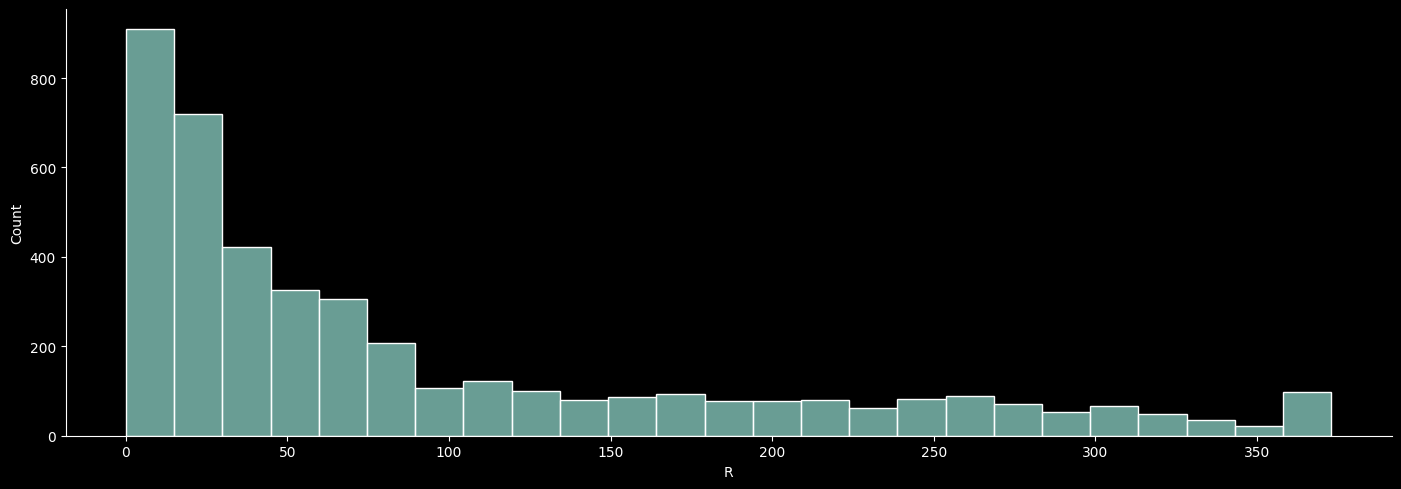

In [ ]:
# R값별로 customer가 몇 명이나 있는지 시각화 해 보자.
sns.displot(data=df_R, x='R')
plt.gcf().set_size_inches(16,5)
plt.show()

# R이 적은 고객이 많고, 100 근처부터 마지막 R값 까지는 customer의 수가 크게 달라지지 않는다.

### F(Frequency)

In [ ]:
# 이제 F값을 구해보자.
# F : 한 고객이 몇 번이나 구매했는가를 나타냄.

df_F = df.copy().drop_duplicates(subset=['CustomerID', 'InvoiceNo'], keep='first')
df_F = df_F.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
df_F.columns = ['CustomerID', 'F']
df_F

,CustomerID,F
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


### M(Monetary)

In [ ]:
# M값도 구하자
# M : 고객 별 총 구매 금액
# 구매금액 = 구매 품목 수 * 품목 단가

df_M = df.copy()
df_M['total_cost'] = df['UnitPrice']*df['Quantity']
df_M = df_M.groupby('CustomerID', as_index=False)['total_cost'].sum()
df_M.columns = ['CustomerID', 'M']
df_M

,CustomerID,M
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [ ]:
# df_R, df_F, df_M을 합쳐서 df_RFM을 만들자.

df_RF = df_R.merge(df_F, how='left', on='CustomerID')
df_RFM = df_RF.merge(df_M, how='left', on='CustomerID')

df_RFM

# 잘 만들어졌다.

,CustomerID,last_order,R,F,M
0,12346.0,2011-01-18,325,1,77183.60
1,12347.0,2011-12-07,2,7,4310.00
2,12348.0,2011-09-25,75,4,1797.24
3,12349.0,2011-11-21,18,1,1757.55
4,12350.0,2011-02-02,310,1,334.40
...,...,...,...,...,...
4334,18280.0,2011-03-07,277,1,180.60
4335,18281.0,2011-06-12,180,1,80.82
4336,18282.0,2011-12-02,7,2,178.05
4337,18283.0,2011-12-06,3,16,2094.88


## RFM 활용 - 서비스 이용수준 측정

### 스케일링

In [ ]:
# R, F, M값을 각각 0~1사이로 스케일링.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_RFM[['R', 'F', 'M']] = scaler.fit_transform(df_RFM[['R', 'F', 'M']])

# R은 숫자가 작을 수록 높은 값을 가져야 하니까, 아래와 같이 후 처리를 해준다.
df_RFM['R'] = 1-df_RFM['R']

df_RFM

,CustomerID,last_order,R,F,M
0,12346.0,2011-01-18,0.128686,0.000000,0.275453
1,12347.0,2011-12-07,0.994638,0.028708,0.015382
2,12348.0,2011-09-25,0.798928,0.014354,0.006414
3,12349.0,2011-11-21,0.951743,0.000000,0.006272
4,12350.0,2011-02-02,0.168901,0.000000,0.001193
...,...,...,...,...,...
4334,18280.0,2011-03-07,0.257373,0.000000,0.000645
4335,18281.0,2011-06-12,0.517426,0.000000,0.000288
4336,18282.0,2011-12-02,0.981233,0.004785,0.000635
4337,18283.0,2011-12-06,0.991957,0.071770,0.007476


In [ ]:
# RFM값을 모두 더해준, RFM_Score라는 열을 추가하자.
df_RFM['RFM_score'] = df_RFM['R']+df_RFM['F']+df_RFM['M']

df_RFM

,CustomerID,last_order,R,F,M,RFM_score
0,12346.0,2011-01-18,0.128686,0.000000,0.275453,0.404139
1,12347.0,2011-12-07,0.994638,0.028708,0.015382,1.038728
2,12348.0,2011-09-25,0.798928,0.014354,0.006414,0.819696
3,12349.0,2011-11-21,0.951743,0.000000,0.006272,0.958015
4,12350.0,2011-02-02,0.168901,0.000000,0.001193,0.170094
...,...,...,...,...,...,...
4334,18280.0,2011-03-07,0.257373,0.000000,0.000645,0.258017
4335,18281.0,2011-06-12,0.517426,0.000000,0.000288,0.517715
4336,18282.0,2011-12-02,0.981233,0.004785,0.000635,0.986653
4337,18283.0,2011-12-06,0.991957,0.071770,0.007476,1.071204


In [ ]:
# RFM score도 스케일링 하기.
df_RFM[['RFM_score']] = scaler.fit_transform(df_RFM[['RFM_score']])

# RFM score는 1점 만점 말고 100점 만점으로 바꿔주자.
df_RFM['RFM_score']=df_RFM['RFM_score']*100
df_RFM['RFM_score']=round(df_RFM['RFM_score'],0)

df_RFM

,CustomerID,last_order,R,F,M,RFM_score
0,12346.0,2011-01-18,0.128686,0.000000,0.275453,16.0
1,12347.0,2011-12-07,0.994638,0.028708,0.015382,42.0
2,12348.0,2011-09-25,0.798928,0.014354,0.006414,33.0
3,12349.0,2011-11-21,0.951743,0.000000,0.006272,39.0
4,12350.0,2011-02-02,0.168901,0.000000,0.001193,7.0
...,...,...,...,...,...,...
4334,18280.0,2011-03-07,0.257373,0.000000,0.000645,10.0
4335,18281.0,2011-06-12,0.517426,0.000000,0.000288,21.0
4336,18282.0,2011-12-02,0.981233,0.004785,0.000635,40.0
4337,18283.0,2011-12-06,0.991957,0.071770,0.007476,43.0


### RFM grade 생성

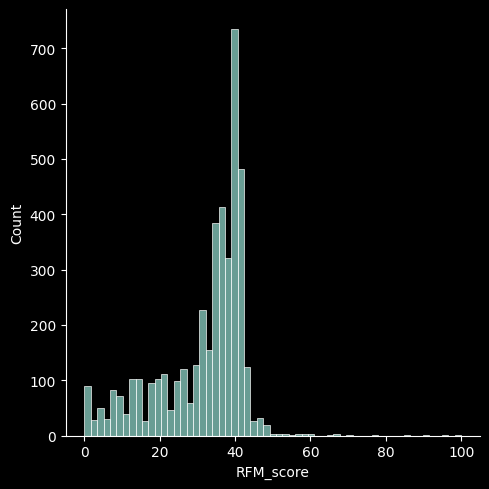

In [ ]:
# 우리 customer들의 RFM값 분포는 어떻게 될까?

sns.displot(df_RFM['RFM_score'])
plt.show()

# 40점대 근처가 제일 많다.

In [ ]:
# 점수별로 고객의 등급 부여
# 60점 이상 Very storong
# 40~60점 Storng
# 20~40점 Normal
# 10~20점 Weak
# 0~10점 Very Weak

df_RFM['Grade'] = df_RFM['RFM_score'].apply(lambda x : '01.Very Strong' if x>=60 else
                                    ('02.Strong' if x>=40 else
                                    ('03.Normal' if x>=20 else
                                    ('04.Weak' if x>=10 else '05.Very Weak'))))
df_RFM

,CustomerID,last_order,R,F,M,RFM_score,Grade
0,12346.0,2011-01-18,0.128686,0.000000,0.275453,16.0,04.Weak
1,12347.0,2011-12-07,0.994638,0.028708,0.015382,42.0,02.Strong
2,12348.0,2011-09-25,0.798928,0.014354,0.006414,33.0,03.Normal
3,12349.0,2011-11-21,0.951743,0.000000,0.006272,39.0,03.Normal
4,12350.0,2011-02-02,0.168901,0.000000,0.001193,7.0,05.Very Weak
...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07,0.257373,0.000000,0.000645,10.0,04.Weak
4335,18281.0,2011-06-12,0.517426,0.000000,0.000288,21.0,03.Normal
4336,18282.0,2011-12-02,0.981233,0.004785,0.000635,40.0,02.Strong
4337,18283.0,2011-12-06,0.991957,0.071770,0.007476,43.0,02.Strong


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09


In [ ]:
df_RFM

,CustomerID,last_order,R,F,M,RFM_score,Grade
0,12346.0,2011-01-18,0.128686,0.000000,0.275453,16.0,04.Weak
1,12347.0,2011-12-07,0.994638,0.028708,0.015382,42.0,02.Strong
2,12348.0,2011-09-25,0.798928,0.014354,0.006414,33.0,03.Normal
3,12349.0,2011-11-21,0.951743,0.000000,0.006272,39.0,03.Normal
4,12350.0,2011-02-02,0.168901,0.000000,0.001193,7.0,05.Very Weak
...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07,0.257373,0.000000,0.000645,10.0,04.Weak
4335,18281.0,2011-06-12,0.517426,0.000000,0.000288,21.0,03.Normal
4336,18282.0,2011-12-02,0.981233,0.004785,0.000635,40.0,02.Strong
4337,18283.0,2011-12-06,0.991957,0.071770,0.007476,43.0,02.Strong


In [ ]:
# 기존 데이터에 RFM grade 합치기
df = pd.merge(df, df_RFM, how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,last_order,R,F,M,RFM_score,Grade
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak


In [ ]:
# 년월만 새로운 column으로 정의
df['Date_1'] = df["Date"].dt.strftime("%Y-%m")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,last_order,R,F,M,RFM_score,Grade,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-02,0.002681,0.157895,0.01924,7.0,05.Very Weak,2010-12


### 지표 기획

#### 월 별 이용 고객 현황

In [ ]:
# 월별 이용 고객 현황
df_cus = df.groupby('Date_1',as_index=False)['CustomerID'].nunique()
df_cus

,Date_1,CustomerID
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856
5,2011-05,1056
6,2011-06,991
7,2011-07,949
8,2011-08,935
9,2011-09,1266


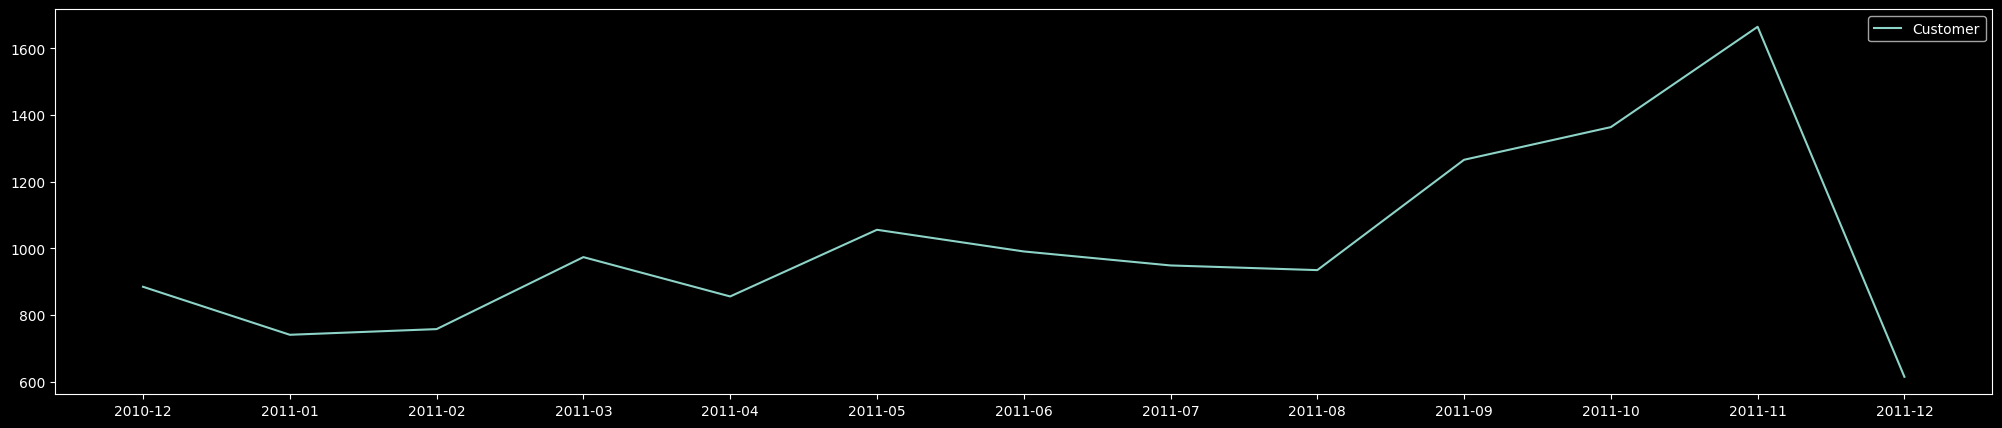

In [ ]:
# ▶ 2010.12 런칭이후 사용자 수가 증가하고 2011.11월 Peak를 달성했으나, 곤두박질..
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='Customer');
plt.legend();
plt.gcf().set_size_inches(25, 5)

#### 월 별 이용 건수

In [ ]:
# 월별 이용 건수
df_cnt = df.groupby('Date_1',as_index=False)['InvoiceNo'].nunique()
df_cnt.head(5)

,Date_1,InvoiceNo
0,2010-12,1400
1,2011-01,987
2,2011-02,998
3,2011-03,1321
4,2011-04,1149


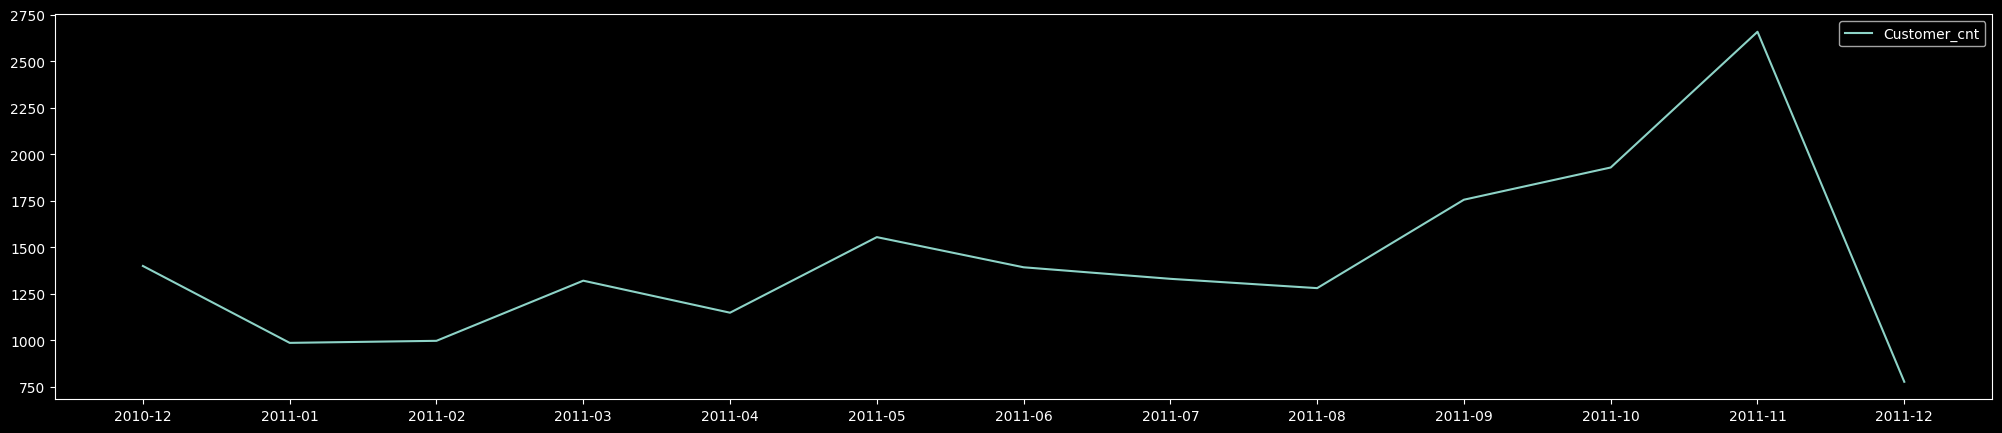

In [ ]:
# 월별 이용 고객수와 비슷한 양상
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='Customer_cnt');
plt.legend();
plt.gcf().set_size_inches(25, 5)

#### 월 별 이용 국가

In [ ]:
# 월별 이용 국가
df_country = df.groupby('Date_1',as_index=False)['Country'].nunique()
df_country.head(5)

,Date_1,Country
0,2010-12,22
1,2011-01,20
2,2011-02,24
3,2011-03,22
4,2011-04,24


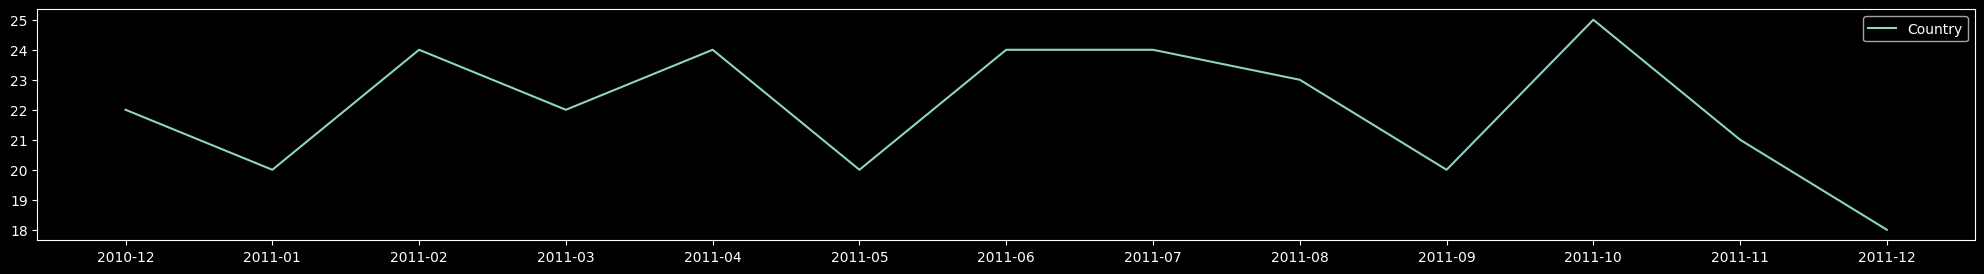

In [ ]:
plt.plot(df_country['Date_1'], df_country['Country'], label='Country');
plt.legend();
plt.gcf().set_size_inches(25, 3)

In [ ]:
# 가장 많이 이용한 나라
pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False)).head(10)

,InvoiceNo
Country,
United Kingdom,16649
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,95
Spain,90
Australia,57
Portugal,57


#### 월 별 Grade 이용 비중

In [ ]:
df_grade = df.groupby(['Date_1', 'Grade'],as_index=False)['CustomerID'].nunique()
df_grade

,Date_1,Grade,CustomerID
0,2010-12,01.Very Strong,11
1,2010-12,02.Strong,400
2,2010-12,03.Normal,288
3,2010-12,04.Weak,42
4,2010-12,05.Very Weak,144
5,2011-01,01.Very Strong,11
6,2011-01,02.Strong,339
7,2011-01,03.Normal,254
8,2011-01,04.Weak,34
9,2011-01,05.Very Weak,103


In [ ]:
df_pivot = pd.pivot_table(df_grade,
                      index = 'Date_1',
                      columns = 'Grade',
                      values = 'CustomerID')

df_pivot.fillna(0, inplace=True)
df_pivot['total'] = df_pivot['01.Very Strong'] + df_pivot['02.Strong'] + df_pivot['03.Normal'] + df_pivot['04.Weak'] + df_pivot['05.Very Weak']


# 월별 각 grade의 비율 나타내기

df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot

Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak
Date_1,,,,,
2010-12,0.012429,0.451977,0.325424,0.047458,0.162712
2011-01,0.014845,0.457490,0.342780,0.045884,0.139001
2011-02,0.014512,0.420844,0.375989,0.056728,0.131926
2011-03,0.012320,0.408624,0.381930,0.197125,0.000000
2011-04,0.014019,0.422897,0.393692,0.169393,0.000000
2011-05,0.012311,0.431818,0.424242,0.131629,0.000000
2011-06,0.012109,0.431887,0.556004,0.000000,0.000000
2011-07,0.012645,0.446786,0.540569,0.000000,0.000000
2011-08,0.012834,0.456684,0.530481,0.000000,0.000000


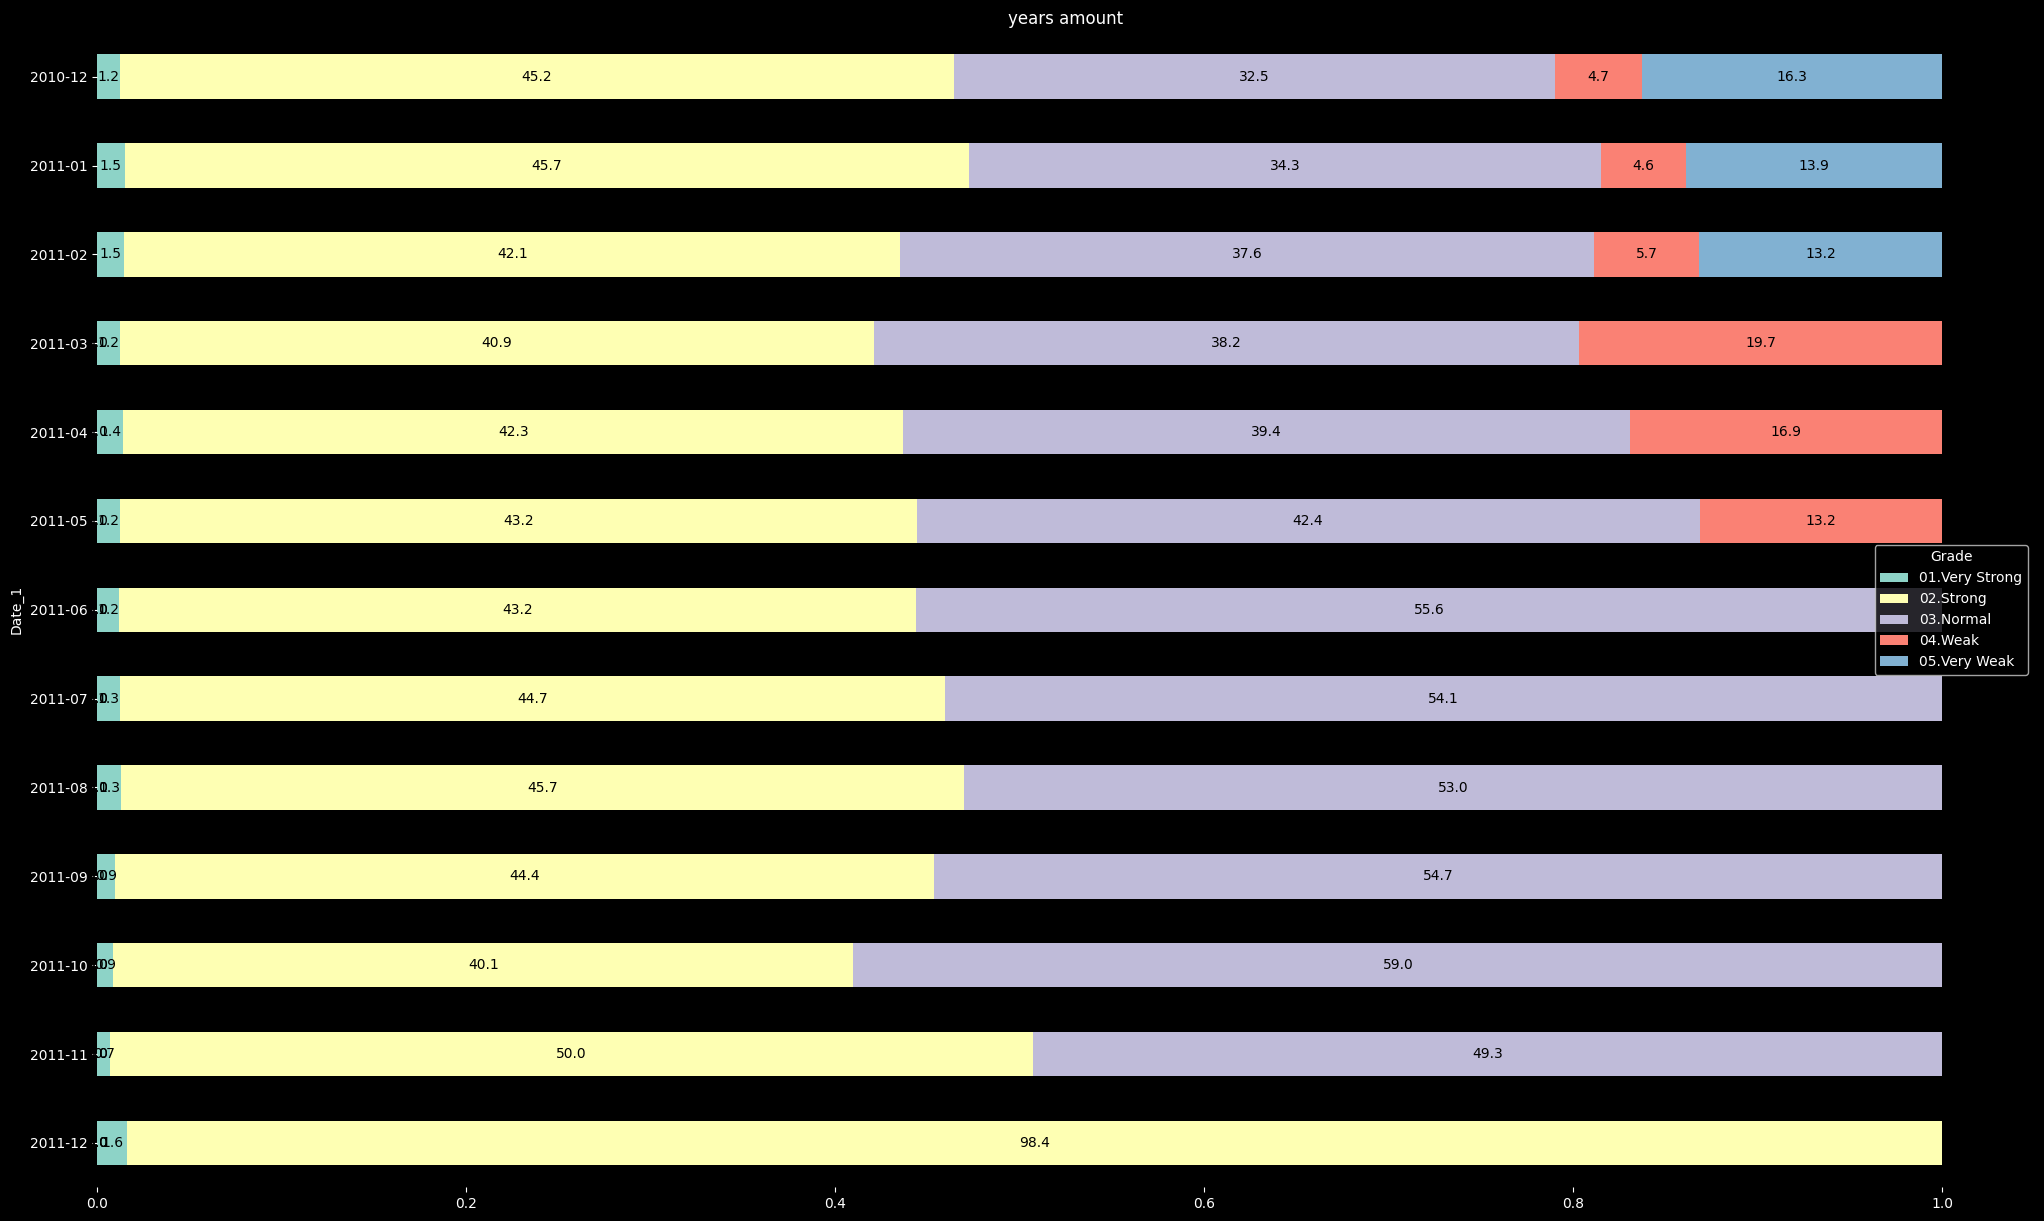

In [ ]:
df_pivot = df_pivot.sort_index(ascending=False)

plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amount", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black');

plt.box(False)
plt.gcf().set_size_inches(25, 15)
plt.show()

# 결과를 보자.
# 마지막 월에 갑자기 strong 고객의 비율이 급증한다. 거의 대부분이 strong이라고 봐도 될 정도.
# 과연 이것이 긍정적인 결과인가? 절대 아니다.

# 왜냐? => 늘어난 건 strong 고객의 "비율"이기 때문. 이것이 무슨 말이냐 하면...
# 앞서 보았던 월별 고객 현황, 월별 이용 건수, 월별 이용국가는 마지막 달에 모두 폭락했다. 확인하지 않은 다른 지표들도 아마 폭락했을 것이다.
# 즉 이용 고객의 절대량이 확 줄어들었다는 것인데, strong 고객의 비율이 급등했다는 것은?
# 기존에 이 서비스를 이용하던 대부분의 고객이 떠나가고, 마지막 달에 RFM score를 집계할 때에는 그 달에 처음 이용한 소수의 고객들만이 포함되었다는 것이다.
# 그러니까 다 strong으로 잡혔겠지. R 값이 굉장히 작을 테니까(R값이 작으면 R_score는 커지고, 그것이 RFM_score에 반영되어 grade에도 영향을 주었을 것이다)

# 즉 정리하자면, 마지막 달에는 왠지는 모르겠으나 기존 고객이 거의 다 이탈한, 굉장히 위험한 상황이라는 것이다.
# RFM grade로만 보자면 이상하리만치 긍정적으로 보이겠지만, 다른 지표와 결합해서 판단해야 한다.